# E4-1 Linear Regression Demo

This code demonstrates the use of linear regression methods for machine learning.

## Step 1: Imports

In [51]:
# For data manipulation
import pandas as pd
# for scientific computation
import numpy as np

# for data analysis
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### Input Data

In [52]:
# Input file containing data
input_file = './data-assets/data_singlevar_regr.txt' 

# Read data from the input_file
data = np.loadtxt(input_file, delimiter=',')

In [53]:
# See the shape (number of rows) and size (number of columns)
data.shape

(60, 2)

In [54]:
# See how it looks 
# print(data)
print(data[0:5, :])

[[-0.86  4.38]
 [ 2.58  6.97]
 [ 4.17  7.01]
 [ 2.6   5.44]
 [ 5.13  6.45]]


### Preprocessing Data

In [55]:
# Scaling the data
scaler = StandardScaler() 
scaler.fit(data) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
# Split X and y
X, y = data[:, :-1], data[:, -1]

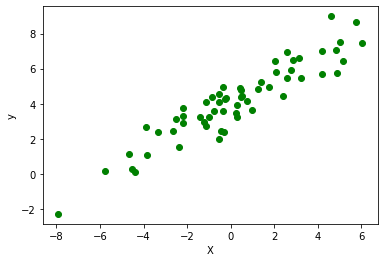

In [57]:
# Plot all
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, color='green')
plt.show()

## Step 3: Train Model

### Train a Model with Polyfit

In [58]:
# The last parameter is the degree of the polynomial
x = X.reshape(X.shape[0])
[a, b] = np.polyfit(x, y, 1)
print(a, b)

0.6650925836782712 4.014354955713883


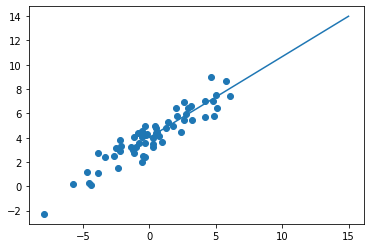

In [75]:
# plot the line
plt.scatter(X, y)
plt.plot([0, 15], [b, a*15+b])

### Train a Model with scikit-learn

In [60]:
# Split in train and test
ntr = int(0.8 * len(X))
nts = len(X) - ntr

# Training data
X_train, y_train = X[:ntr], y[:ntr]

# Test data
X_test, y_test = X[ntr:], y[ntr:]

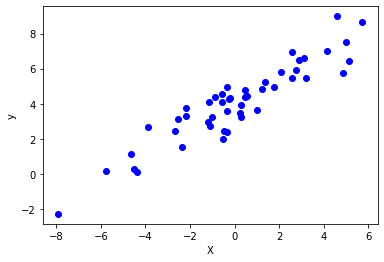

In [61]:
# Plot train data
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

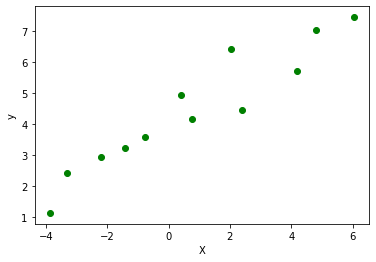

In [62]:
# Plot test data - randomly selected
plt.scatter(X_test, y_test, color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [63]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 4: Test the Model

In [64]:
# Predict the output
y_predicted = regressor.predict(X_test)
y_predicted

array([7.35457041, 5.67357393, 1.73049578, 1.356941  , 3.05177284,
       8.20544517, 6.91875651, 3.48758674, 2.50527604, 4.55290961,
       5.42453742, 4.31770846])

In [65]:
# Calculate a score associated with this model
regressor.score(X_test, y_test)

0.8585327510951147

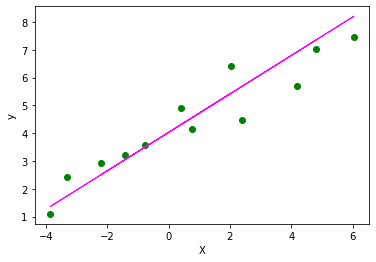

In [66]:
# Plot output
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_predicted, color='magenta', linewidth=1)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Step 5: Validate the Accuracy

In [67]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [68]:
# Perform prediction on train data, reuse
y_new_prediction = regressor.predict(X_test)
y_new_prediction

array([7.35457041, 5.67357393, 1.73049578, 1.356941  , 3.05177284,
       8.20544517, 6.91875651, 3.48758674, 2.50527604, 4.55290961,
       5.42453742, 4.31770846])

In [69]:
print("New R2 score = ", round(sm.r2_score(y_test, y_new_prediction), 2))

New R2 score =  0.86


## Step 6: Implement the Model for Prediction of New Data

In [70]:
my_prediction = regressor.predict([[-5.86]])
print(my_prediction)
print("Mean squared error = ", round(sm.mean_squared_error([-0.86], my_prediction), 2))
# [-0.86  1.11]

[-0.02659519]
Mean squared error =  0.69


In [71]:
my_prediction = regressor.predict([[5.42]])
print(my_prediction)
# [0.42 4.92]

[7.77654895]


## Step 7: Store the Model in a File

In [72]:
# Store the model in a file
reg_model_file = '../data-assets/regressor.pkl'

# Save now
with open(reg_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [73]:
# To load it later for reuse
with open(reg_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

In [74]:
# Test reading from the file
my_prediction = regressor_model.predict([[0.42]])
print(my_prediction)

[4.31770846]
